<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Modeling/Sophie_Tsai_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/BTT Personal Project (Group 14)/heart_2020_cleaned.csv')
df   

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
# Check for nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Creating new column BMIGroup for BMI Categories
df.loc[df['BMI']<18.5, 'BMIGroup'] = 'Underweight'
df.loc[df['BMI'].between(18.5,25,inclusive='left'), 'BMIGroup'] = 'Healthy Weight'
df.loc[df['BMI'].between(25,30,inclusive='left'), 'BMIGroup'] = 'Overweight'
df.loc[df['BMI']>=30, 'BMIGroup'] = 'Obesity'

# **Balancing & Splitting Data**

## **Sophie - Encoding, SMOTE, and 80/20 Split**

In [6]:
# Make a copy of the data for encoding
df_encoded = df.copy()

In [7]:
# Encode categorical columns with 2 values (e.g. Yes/No)

le = preprocessing.LabelEncoder()
encoding_lst = []
binary_cols = [col for col in df_encoded.columns if df_encoded[col].dtype not in [int, float]
               and df_encoded[col].nunique() == 2]

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_lst.append([col, le_mapping])

# Printing the encoding mapping for reference
for row in encoding_lst:
    print(*row)
    
df_encoded.head()

HeartDisease {'No': 0, 'Yes': 1}
Smoking {'No': 0, 'Yes': 1}
AlcoholDrinking {'No': 0, 'Yes': 1}
Stroke {'No': 0, 'Yes': 1}
DiffWalking {'No': 0, 'Yes': 1}
Sex {'Female': 0, 'Male': 1}
PhysicalActivity {'No': 0, 'Yes': 1}
Asthma {'No': 0, 'Yes': 1}
KidneyDisease {'No': 0, 'Yes': 1}
SkinCancer {'No': 0, 'Yes': 1}


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,Underweight
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,Healthy Weight
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,Healthy Weight
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,Healthy Weight


In [8]:
# Encoding categorical columns with more than 2 values

ageCategory = {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].replace(ageCategory)

race = {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'White': 4, 'Other': 5}
df_encoded['Race'] = df_encoded['Race'].replace(race)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df_encoded['Diabetic'] = df_encoded['Diabetic'].replace(diabetic)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df_encoded['GenHealth'] = df_encoded['GenHealth'].replace(genHealth)

bmiGroup = {'Underweight':0, 'Healthy Weight':1, 'Overweight':2, 'Obesity':3}
df_encoded['BMIGroup'] = df_encoded['BMIGroup'].replace(bmiGroup)

df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,3,1,3,5.0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,3,7.0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,3,1,1,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,3,8.0,0,0,0,1


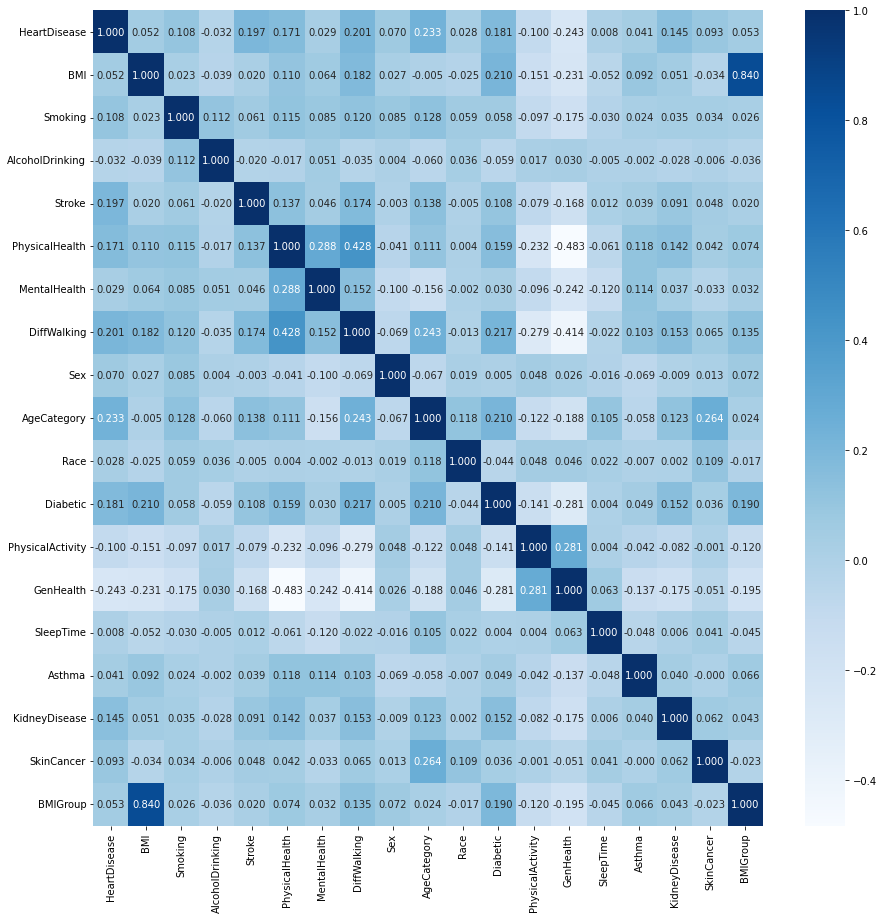

In [9]:
# Correlation Matrix
plt.figure(figsize=(15,15))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3f')
plt.show()

In [80]:
X = df_encoded.drop('HeartDisease',axis=1)
Y = df_encoded['HeartDisease']

In [82]:
# Oversampling using SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
resample = SMOTE(k_neighbors=NearestNeighbors(n_neighbors=5, algorithm="kd_tree"),random_state = 52)
X, Y = resample.fit_resample(X, Y)
X.info()
Y.value_counts() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               584844 non-null  float64
 1   Smoking           584844 non-null  int64  
 2   AlcoholDrinking   584844 non-null  int64  
 3   Stroke            584844 non-null  int64  
 4   PhysicalHealth    584844 non-null  float64
 5   MentalHealth      584844 non-null  float64
 6   DiffWalking       584844 non-null  int64  
 7   Sex               584844 non-null  int64  
 8   AgeCategory       584844 non-null  int64  
 9   Race              584844 non-null  int64  
 10  Diabetic          584844 non-null  int64  
 11  PhysicalActivity  584844 non-null  int64  
 12  GenHealth         584844 non-null  int64  
 13  SleepTime         584844 non-null  float64
 14  Asthma            584844 non-null  int64  
 15  KidneyDisease     584844 non-null  int64  
 16  SkinCancer        58

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [12]:
# Split dataset into 80 training, 20 testing 
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, Y, test_size=0.2, random_state=2023)
print('training data shape is :{}.'.format(X_train_SMOTE.shape))
print('training label shape is :{}.'.format(y_train_SMOTE.shape))
print('testing data shape is :{}.'.format(X_test_SMOTE.shape))
print('testing label shape is :{}.'.format(y_test_SMOTE.shape))

training data shape is :(467875, 18).
training label shape is :(467875,).
testing data shape is :(116969, 18).
testing label shape is :(116969,).


### **Ryan's Random Oversampling Encoded**

In [13]:
X = df_encoded
Y = df_encoded['HeartDisease']
from imblearn.over_sampling import RandomOverSampler
randomos = RandomOverSampler(random_state = 0)
oversampledX, oversampledY = randomos.fit_resample(X,Y)
print(oversampledX.shape, oversampledY.shape)

(584844, 19) (584844,)


In [14]:
oversampled_training_data, oversampled_testing_data = train_test_split(oversampledX, test_size=0.2, random_state=25)
print(f"No. of training examples: {oversampled_training_data.shape[0]}")
print(f"No. of testing examples: {oversampled_testing_data.shape[0]}")

No. of training examples: 467875
No. of testing examples: 116969


In [15]:
# Split independent and dependent for oversampled
X_oversampled_training_data = oversampled_training_data.drop('HeartDisease',axis=1)
y_oversampled_training_data = oversampled_training_data['HeartDisease']

X_oversampled_testing_data = oversampled_testing_data.drop('HeartDisease',axis=1)
y_oversampled_testing_data = oversampled_testing_data['HeartDisease']

### **Hannah & Sukriti's Random Undersampling Encoded**

In [16]:
# Use Random Undersampler
from imblearn.under_sampling import RandomUnderSampler

# Set the variables
X = df_encoded.drop('HeartDisease', axis = 1)
y = df_encoded['HeartDisease']

# Amount of data prior to undersampling
print("Before undersampling: ", Counter(df['HeartDisease']))

# Apply the undersampler
undersample = RandomUnderSampler(sampling_strategy= 'majority')
X_rs, y_rs = undersample.fit_resample(X, y)

# Amount of data post undersampling
print("After undersampling:",Counter(y_rs))

# New dataset that is correctly undersampled
undersampled_df = X_rs
undersampled_df.insert(0, 'HeartDisease', y_rs)

Before undersampling:  Counter({'No': 292422, 'Yes': 27373})
After undersampling: Counter({0: 27373, 1: 27373})


In [17]:
# Split-out validation dataset using train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
undersampled_training_data, undersampled_testing_data = train_test_split(undersampled_df, test_size=0.2, random_state=25)

# Show the number of items per set
print(f"No. of training examples: {undersampled_training_data.shape[0]}")
print(f"No. of testing examples: {undersampled_testing_data.shape[0]}")

No. of training examples: 43796
No. of testing examples: 10950


In [18]:
# Split independent and dependent for undersampled data
X_undersampled_training_data = undersampled_training_data.drop('HeartDisease',axis=1)
y_undersampled_training_data = undersampled_training_data['HeartDisease']

X_undersampled_testing_data = undersampled_testing_data.drop('HeartDisease',axis=1)
y_undersampled_testing_data = undersampled_testing_data['HeartDisease']

# **Building Models**

## **Helper functions & variables for modeling**

In [19]:
# # SMOTE
# model.fit(X_train_SMOTE, y_train_SMOTE)
# model.score(X_train_SMOTE, y_train_SMOTE)
# # Random Oversampled
# model.fit(X_oversampled_training_data, y_oversampled_training_data)
# model.score(X_oversampled_training_data, y_oversampled_training_data)
# # Random Undersampled
# model.fit(X_undersampled_training_data, y_undersampled_training_data)
# model.score(X_undersampled_training_data, y_undersampled_training_data)

In [20]:
from sklearn import metrics
import numpy as np

In [21]:
results = pd.DataFrame(columns=['Model','Resampling Method','Train Accuracy','Test Accuracy','Recall','Precision','F1 Score'])

In [22]:
resampling_methods = {"SMOTE": [X_train_SMOTE, y_train_SMOTE, X_test_SMOTE, y_test_SMOTE], 
                      "Random Oversampled": [X_oversampled_training_data, y_oversampled_training_data, X_oversampled_testing_data, y_oversampled_testing_data],
                      "Random Undersampled": [X_undersampled_training_data, y_undersampled_training_data, X_undersampled_testing_data, y_undersampled_testing_data]
                     }

In [23]:
def plot_confusion_matrix(name, y_test, test_pred):
  cm = metrics.confusion_matrix(y_test,test_pred)
  ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

  ax.set_title(name)
  ax.set(xlabel='Predicted labels', ylabel='True labels')
  ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
  ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

  plt.show()

In [60]:
def test_model(name, model):
  for method in resampling_methods:
    print()
    model.fit(resampling_methods[method][0], resampling_methods[method][1])
    # train_score = model.score(resampling_methods[method][0], resampling_methods[method][1])
    # test_score = model.score(resampling_methods[method][2], resampling_methods[method][3])
    # print(method,"Train Score:",train_score)
    # print(method,"Test Score:",test_score)

    train_pred = model.predict(resampling_methods[method][0])
    test_pred = model.predict(resampling_methods[method][2])
    train_acc = metrics.accuracy_score(resampling_methods[method][1], train_pred)*100
    test_acc = metrics.accuracy_score(resampling_methods[method][3], test_pred)*100
    print(method,"Train Accuracy:",train_acc)
    print(method,"Test Accuracy:",test_acc)
    plot_confusion_matrix(method, resampling_methods[method][3], test_pred)
    print(metrics.classification_report(resampling_methods[method][3],test_pred))

    recall = metrics.recall_score(resampling_methods[method][3], test_pred)*100
    precision = metrics.precision_score(resampling_methods[method][3], test_pred)*100
    f1 = metrics.f1_score(resampling_methods[method][3], test_pred)*100
    results.loc[len(results.index)] = [name, method, train_acc, test_acc, recall, precision, f1]


## **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver='sag', max_iter=4000, random_state=2023)


SMOTE Train Accuracy: 77.10777451242319
SMOTE Test Accuracy: 77.12812796552933


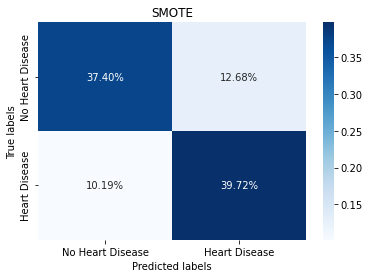

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     58584
           1       0.76      0.80      0.78     58385

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969


Random Oversampled Train Accuracy: 76.40822869356131
Random Oversampled Test Accuracy: 76.49719156357668


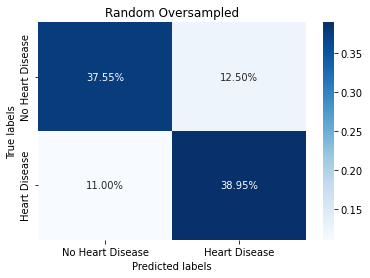

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58542
           1       0.76      0.78      0.77     58427

    accuracy                           0.76    116969
   macro avg       0.77      0.76      0.76    116969
weighted avg       0.77      0.76      0.76    116969


Random Undersampled Train Accuracy: 76.71933509909582
Random Undersampled Test Accuracy: 76.89497716894978


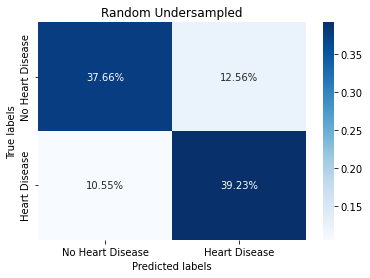

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5499
           1       0.76      0.79      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [27]:
test_model("Logistic Regression", model)

In [28]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293


## **Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier(max_depth=10, random_state=2023)


SMOTE Train Accuracy: 79.35388725621159
SMOTE Test Accuracy: 79.09189614342262


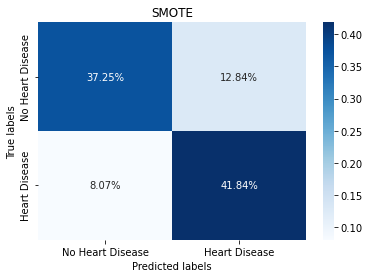

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     58584
           1       0.77      0.84      0.80     58385

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969


Random Oversampled Train Accuracy: 77.63120491584291
Random Oversampled Test Accuracy: 77.44445109387958


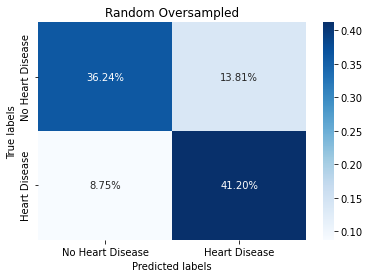

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     58542
           1       0.75      0.82      0.79     58427

    accuracy                           0.77    116969
   macro avg       0.78      0.77      0.77    116969
weighted avg       0.78      0.77      0.77    116969


Random Undersampled Train Accuracy: 78.60078545985935
Random Undersampled Test Accuracy: 76.78538812785388


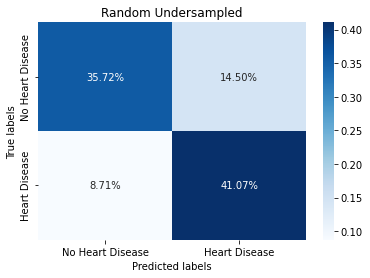

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      5499
           1       0.74      0.82      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [31]:
test_model("Random Forest", model)

In [32]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632


##  **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier(max_depth=15, random_state=2023)


SMOTE Train Accuracy: 83.8702644937216
SMOTE Test Accuracy: 81.74730056681685


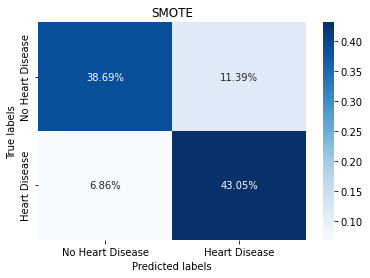

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     58584
           1       0.79      0.86      0.83     58385

    accuracy                           0.82    116969
   macro avg       0.82      0.82      0.82    116969
weighted avg       0.82      0.82      0.82    116969


Random Oversampled Train Accuracy: 82.56500133582688
Random Oversampled Test Accuracy: 81.29760876813515


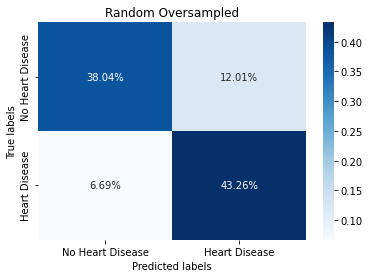

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     58542
           1       0.78      0.87      0.82     58427

    accuracy                           0.81    116969
   macro avg       0.82      0.81      0.81    116969
weighted avg       0.82      0.81      0.81    116969


Random Undersampled Train Accuracy: 85.87770572655037
Random Undersampled Test Accuracy: 73.0593607305936


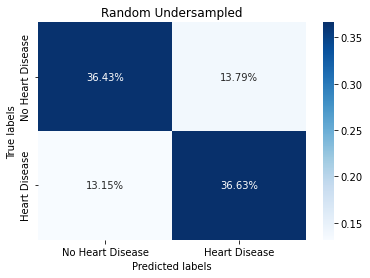

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5499
           1       0.73      0.74      0.73      5451

    accuracy                           0.73     10950
   macro avg       0.73      0.73      0.73     10950
weighted avg       0.73      0.73      0.73     10950



In [35]:
test_model("Decision Tree", model)

In [36]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380


## **Adaboost**

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
model = AdaBoostClassifier(random_state=2023)


SMOTE Train Accuracy: 79.2489446967673
SMOTE Test Accuracy: 79.39539536116406


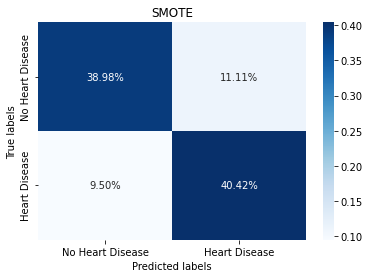

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     58584
           1       0.78      0.81      0.80     58385

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969


Random Oversampled Train Accuracy: 76.2408763024312
Random Oversampled Test Accuracy: 76.23729364190513


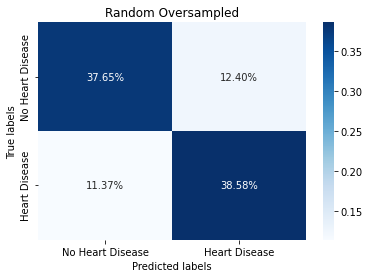

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58542
           1       0.76      0.77      0.76     58427

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969


Random Undersampled Train Accuracy: 76.70791853137273
Random Undersampled Test Accuracy: 76.67579908675799


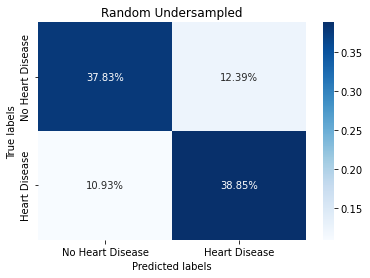

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5499
           1       0.76      0.78      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [39]:
test_model("AdaBoost", model)

In [40]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **CatBoost**

In [41]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
model = CatBoostClassifier(iterations=10, learning_rate=0.5, random_seed=2023)


0:	learn: 0.5677926	total: 255ms	remaining: 2.29s
1:	learn: 0.5220067	total: 434ms	remaining: 1.74s
2:	learn: 0.5004660	total: 549ms	remaining: 1.28s
3:	learn: 0.4897440	total: 641ms	remaining: 961ms
4:	learn: 0.4796439	total: 730ms	remaining: 730ms
5:	learn: 0.4479841	total: 808ms	remaining: 539ms
6:	learn: 0.4367532	total: 889ms	remaining: 381ms
7:	learn: 0.4267262	total: 967ms	remaining: 242ms
8:	learn: 0.4236383	total: 1.04s	remaining: 115ms
9:	learn: 0.4188359	total: 1.09s	remaining: 0us
SMOTE Train Accuracy: 80.65466203580016
SMOTE Test Accuracy: 80.66838222093034


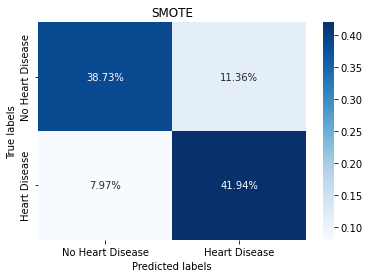

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     58584
           1       0.79      0.84      0.81     58385

    accuracy                           0.81    116969
   macro avg       0.81      0.81      0.81    116969
weighted avg       0.81      0.81      0.81    116969


0:	learn: 0.5738694	total: 158ms	remaining: 1.42s
1:	learn: 0.5305577	total: 374ms	remaining: 1.5s
2:	learn: 0.5102403	total: 552ms	remaining: 1.29s
3:	learn: 0.4995994	total: 727ms	remaining: 1.09s
4:	learn: 0.4943687	total: 911ms	remaining: 911ms
5:	learn: 0.4908572	total: 1.13s	remaining: 752ms
6:	learn: 0.4889710	total: 1.28s	remaining: 548ms
7:	learn: 0.4878678	total: 1.4s	remaining: 349ms
8:	learn: 0.4868781	total: 1.56s	remaining: 173ms
9:	learn: 0.4859768	total: 1.76s	remaining: 0us
Random Oversampled Train Accuracy: 76.84488378306172
Random Oversampled Test Accuracy: 76.77504296010054


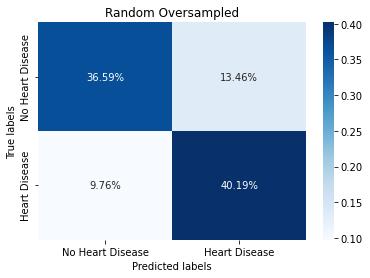

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     58542
           1       0.75      0.80      0.78     58427

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969


0:	learn: 0.5707820	total: 31ms	remaining: 279ms
1:	learn: 0.5272037	total: 54.6ms	remaining: 218ms
2:	learn: 0.5069990	total: 78.8ms	remaining: 184ms
3:	learn: 0.4951797	total: 106ms	remaining: 159ms
4:	learn: 0.4905684	total: 142ms	remaining: 142ms
5:	learn: 0.4862079	total: 169ms	remaining: 113ms
6:	learn: 0.4840310	total: 194ms	remaining: 83.2ms
7:	learn: 0.4826820	total: 221ms	remaining: 55.3ms
8:	learn: 0.4812371	total: 254ms	remaining: 28.2ms
9:	learn: 0.4803935	total: 263ms	remaining: 0us
Random Undersampled Train Accuracy: 77.15316467257284
Random Undersampled Test Accuracy: 76.95890410958904


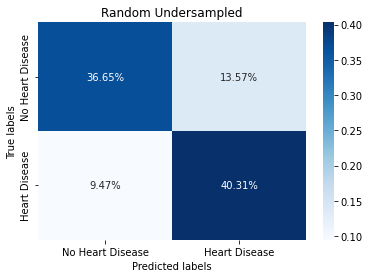

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5499
           1       0.75      0.81      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [43]:
test_model("CatBoost", model)

In [44]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **SGD**

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
model = SGDClassifier(random_state = 2023)


SMOTE Train Accuracy: 76.77135987176062
SMOTE Test Accuracy: 76.87934409971872


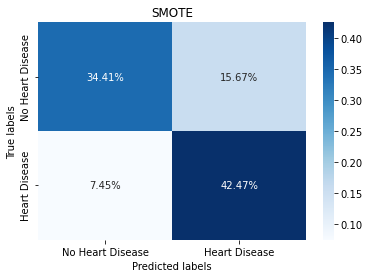

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     58584
           1       0.73      0.85      0.79     58385

    accuracy                           0.77    116969
   macro avg       0.78      0.77      0.77    116969
weighted avg       0.78      0.77      0.77    116969


Random Oversampled Train Accuracy: 69.17510018701576
Random Oversampled Test Accuracy: 69.22004975677316


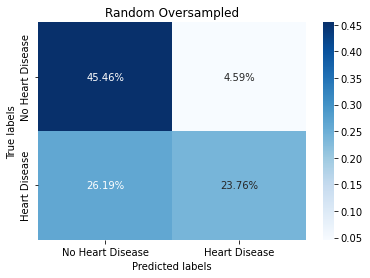

              precision    recall  f1-score   support

           0       0.63      0.91      0.75     58542
           1       0.84      0.48      0.61     58427

    accuracy                           0.69    116969
   macro avg       0.74      0.69      0.68    116969
weighted avg       0.74      0.69      0.68    116969


Random Undersampled Train Accuracy: 74.80591834870765
Random Undersampled Test Accuracy: 75.2420091324201


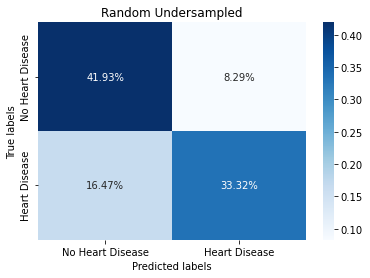

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      5499
           1       0.80      0.67      0.73      5451

    accuracy                           0.75     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.75      0.75     10950



In [47]:
test_model("SGD", model)

In [48]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **Light Gradient Boosting (LGBM)**

In [52]:
from lightgbm import LGBMClassifier

In [53]:
model = LGBMClassifier(max_depth=6, random_state=2023)


SMOTE Train Accuracy: 83.75506278386321
SMOTE Test Accuracy: 83.71876309107542


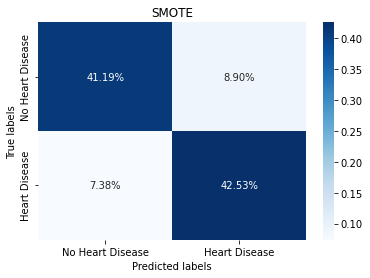

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     58584
           1       0.83      0.85      0.84     58385

    accuracy                           0.84    116969
   macro avg       0.84      0.84      0.84    116969
weighted avg       0.84      0.84      0.84    116969


Random Oversampled Train Accuracy: 77.37878706919584
Random Oversampled Test Accuracy: 77.29227402132189


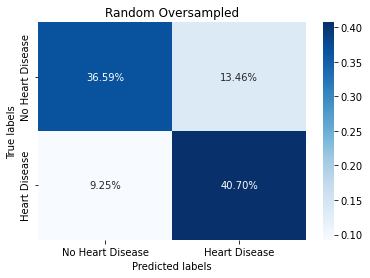

              precision    recall  f1-score   support

           0       0.80      0.73      0.76     58542
           1       0.75      0.81      0.78     58427

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969


Random Undersampled Train Accuracy: 78.29710475842543
Random Undersampled Test Accuracy: 76.8675799086758


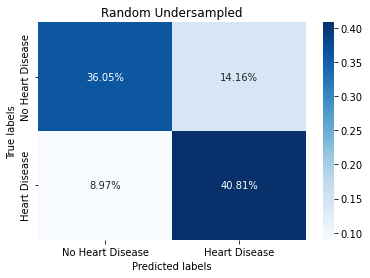

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      5499
           1       0.74      0.82      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [54]:
test_model("LGBM", model)

In [55]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **Ridge**

In [56]:
from sklearn.linear_model import RidgeClassifier

In [57]:
model = RidgeClassifier(random_state=2023)


SMOTE Train Accuracy: 77.10798824472349
SMOTE Test Accuracy: 77.18711795432978


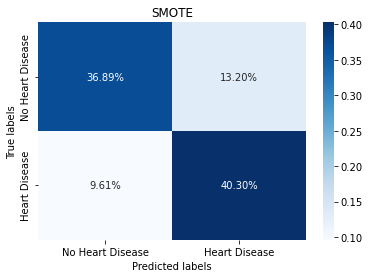

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     58584
           1       0.75      0.81      0.78     58385

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969


Random Oversampled Train Accuracy: 76.36056639059578
Random Oversampled Test Accuracy: 76.42281288204566


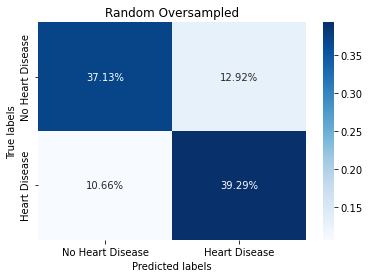

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     58542
           1       0.75      0.79      0.77     58427

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969


Random Undersampled Train Accuracy: 76.6462690656681
Random Undersampled Test Accuracy: 76.87671232876713


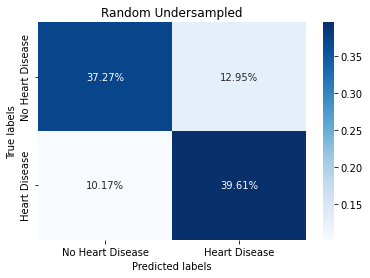

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      5499
           1       0.75      0.80      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [61]:
test_model("Ridge", model)

In [62]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **Dummy**

In [63]:
from sklearn.dummy import DummyClassifier

In [73]:
model = DummyClassifier(random_state=2023) 


SMOTE Train Accuracy: 50.01806037937483
SMOTE Test Accuracy: 50.13123135189665


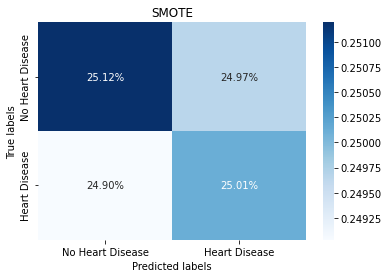

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     58584
           1       0.50      0.50      0.50     58385

    accuracy                           0.50    116969
   macro avg       0.50      0.50      0.50    116969
weighted avg       0.50      0.50      0.50    116969


Random Oversampled Train Accuracy: 49.97574138391664
Random Oversampled Test Accuracy: 50.16542844685345


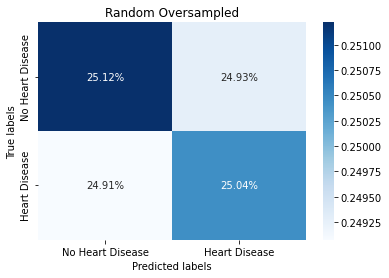

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     58542
           1       0.50      0.50      0.50     58427

    accuracy                           0.50    116969
   macro avg       0.50      0.50      0.50    116969
weighted avg       0.50      0.50      0.50    116969


Random Undersampled Train Accuracy: 50.23289798155083
Random Undersampled Test Accuracy: 50.21917808219178


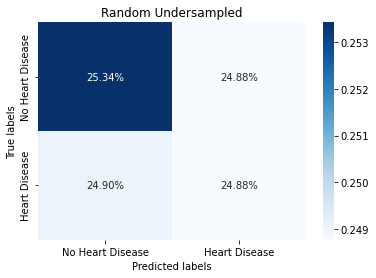

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5499
           1       0.50      0.50      0.50      5451

    accuracy                           0.50     10950
   macro avg       0.50      0.50      0.50     10950
weighted avg       0.50      0.50      0.50     10950



In [74]:
test_model("Dummy", model)

In [75]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **Extra Trees**

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
model = ExtraTreesClassifier(random_state=2023)


SMOTE Train Accuracy: 99.7764360138926
SMOTE Test Accuracy: 90.4667048534227


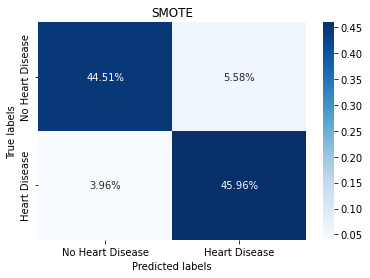

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     58584
           1       0.89      0.92      0.91     58385

    accuracy                           0.90    116969
   macro avg       0.91      0.90      0.90    116969
weighted avg       0.91      0.90      0.90    116969


Random Oversampled Train Accuracy: 99.6612343040342
Random Oversampled Test Accuracy: 97.66946797869521


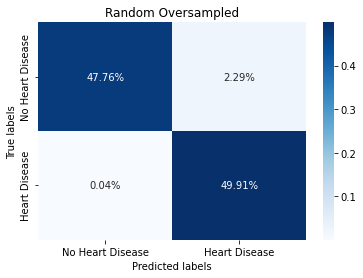

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     58542
           1       0.96      1.00      0.98     58427

    accuracy                           0.98    116969
   macro avg       0.98      0.98      0.98    116969
weighted avg       0.98      0.98      0.98    116969


Random Undersampled Train Accuracy: 99.76253539135995
Random Undersampled Test Accuracy: 73.58904109589041


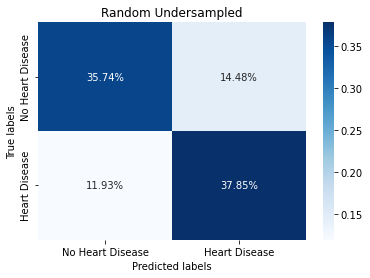

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5499
           1       0.72      0.76      0.74      5451

    accuracy                           0.74     10950
   macro avg       0.74      0.74      0.74     10950
weighted avg       0.74      0.74      0.74     10950



In [78]:
test_model("Extra Trees", model)

In [79]:
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.719335,76.894977,78.811227,75.753835,77.252293
3,Random Forest,SMOTE,79.353887,79.091896,83.828038,76.524853,80.010136
4,Random Forest,Random Oversampled,77.631205,77.444451,82.484125,74.901309,78.510047
5,Random Forest,Random Undersampled,78.600785,76.785388,82.498624,73.903040,77.964632
6,Decision Tree,SMOTE,83.870264,81.747301,86.251606,79.078532,82.509462
7,Decision Tree,Random Oversampled,82.565001,81.297609,86.600373,78.270555,82.225039
8,Decision Tree,Random Undersampled,85.877706,73.059361,73.582829,72.649882,73.113380
9,AdaBoost,SMOTE,79.248945,79.395395,80.976278,78.441067,79.688514


## **GridSearchCV**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {  
#     'n_estimators': [24,28,32],   
#     'max_features': ('sqrt','log2','auto'), 
#     'max_depth':    (5,10,15),     
#     'criterion'   : ['gini', 'entropy'],
# }
# model = RandomForestClassifier()
# gridsearch = GridSearchCV(estimator = model,     
#                           param_grid = parameters, 
#                           cv = 2,
#                           n_jobs = -1,
#                           return_train_score = False,
#                           scoring = "accuracy"      
#                          )
# test_model("GridSearch RF", gridsearch)